# Entrenamiento de modelos

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from data_loading import dataload
from data_exploring import preprocess

In [3]:
link = 'https://drive.google.com/uc?export=download&id=1oOgj9f5UTITTDzMehEIIzNz2aoR2IlgZ'
name = 'stars.csv'
df_stars = dataload(link, name)

Downloading...
From: https://drive.google.com/uc?export=download&id=1oOgj9f5UTITTDzMehEIIzNz2aoR2IlgZ
To: /content/stars.csv
100%|██████████| 8.48k/8.48k [00:00<00:00, 12.8MB/s]


In [4]:
X_train, X_test, y_train, y_test = preprocess(df_stars)

In [9]:
def train(X, y):
  tree = DecisionTreeClassifier(random_state=333)
  tree.fit(X_train, y_train)

  param_grid = {
    "max_depth": range(2, 26),
    "criterion": ["gini", "entropy"]
    }
  gsearch = model_selection.GridSearchCV(tree, 
                   param_grid=param_grid,
                   return_train_score=True, cv=3)

  gsearch.fit(X_train, y_train)
  return gsearch.best_params_['criterion'], gsearch.best_params_['max_depth']

In [10]:
cr, depth = train(X_train, y_train)
print(cr, depth)

('gini', 5)

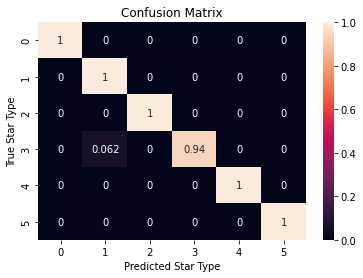

In [13]:
Nombres = {0:'Brown Dwarf',1:'Red Dwarf',2:'White Dwarf',3:'Main Sequence',4:'Supergiant',5:'Hypergiant'}

tree = DecisionTreeClassifier(criterion = cr, max_depth = depth)
tree.fit(X_train,y_train)
prediction = tree.predict(X_test)

cm = confusion_matrix(np.asarray(y_test),prediction)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
CM = sns.heatmap(cmn, xticklabels=Nombres, yticklabels=Nombres, annot = True)
CM.set_ylabel('True Star Type')
CM.set_xlabel('Predicted Star Type')
CM.set_title('Confusion Matrix')
plt.show()
plt.close()